In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV 
from IPython.display import Image 
import seaborn as sns
from sklearn import tree

In [2]:
df=pd.read_csv("C:\\Users\\md kaif\\Downloads\\machine_learning_dataset-20230214T052945Z-001\\machine_learning_dataset\\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=["Name","PassengerId","Ticket","Cabin"],inplace=True)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df["Sex"]=df["Sex"].replace({"male":0,"female":1})

In [16]:
df["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [17]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df["Embarked"]=df["Embarked"].replace({"S":0,"C":1,"Q":2})

In [19]:
df.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [20]:
x=df.drop(columns="Survived")
y=df["Survived"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [22]:
print(x_train.shape)
print(y_train.shape)

(668, 7)
(668,)


In [23]:
print(x_test.shape)
print(y_test.shape)

(223, 7)
(223,)


In [24]:
dtc=DecisionTreeClassifier()

In [25]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=dtc.predict(x_test)

In [27]:
## Model Evaluation

In [28]:
ac=accuracy_score(y_test,y_pred)
ac

0.7668161434977578

In [29]:
confusion_matrix(y_test,y_pred)

array([[111,  34],
       [ 18,  60]], dtype=int64)

In [30]:
## F_1 Score
f1_score(y_test,y_pred,average="weighted")

0.7708536164842167

In [31]:
## Accuracy On Training
y_pred_train=dtc.predict(x_train)

In [33]:
accuracy_score(y_train,y_pred_train)

0.9820359281437125

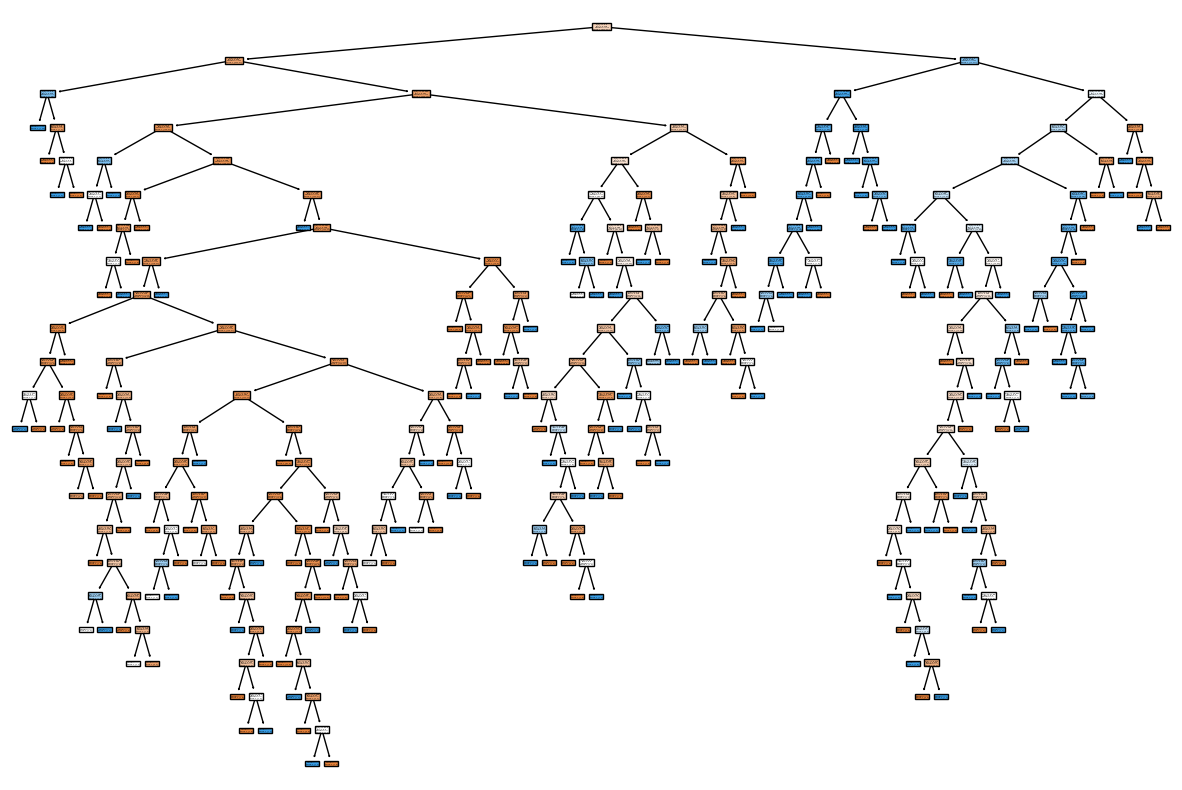

In [38]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)
plt.show()


In [39]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [40]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1,verbose=1)

In [41]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [42]:
grid_search.best_score_

0.8158455841095276

In [43]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}


In [44]:
treemodel=DecisionTreeClassifier(criterion= 'gini',max_depth= 5,min_samples_leaf= 1,min_samples_split= 6,splitter= 'random')

In [45]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=6, splitter='random')

In [46]:
y_pred=treemodel.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred)

0.8385650224215246

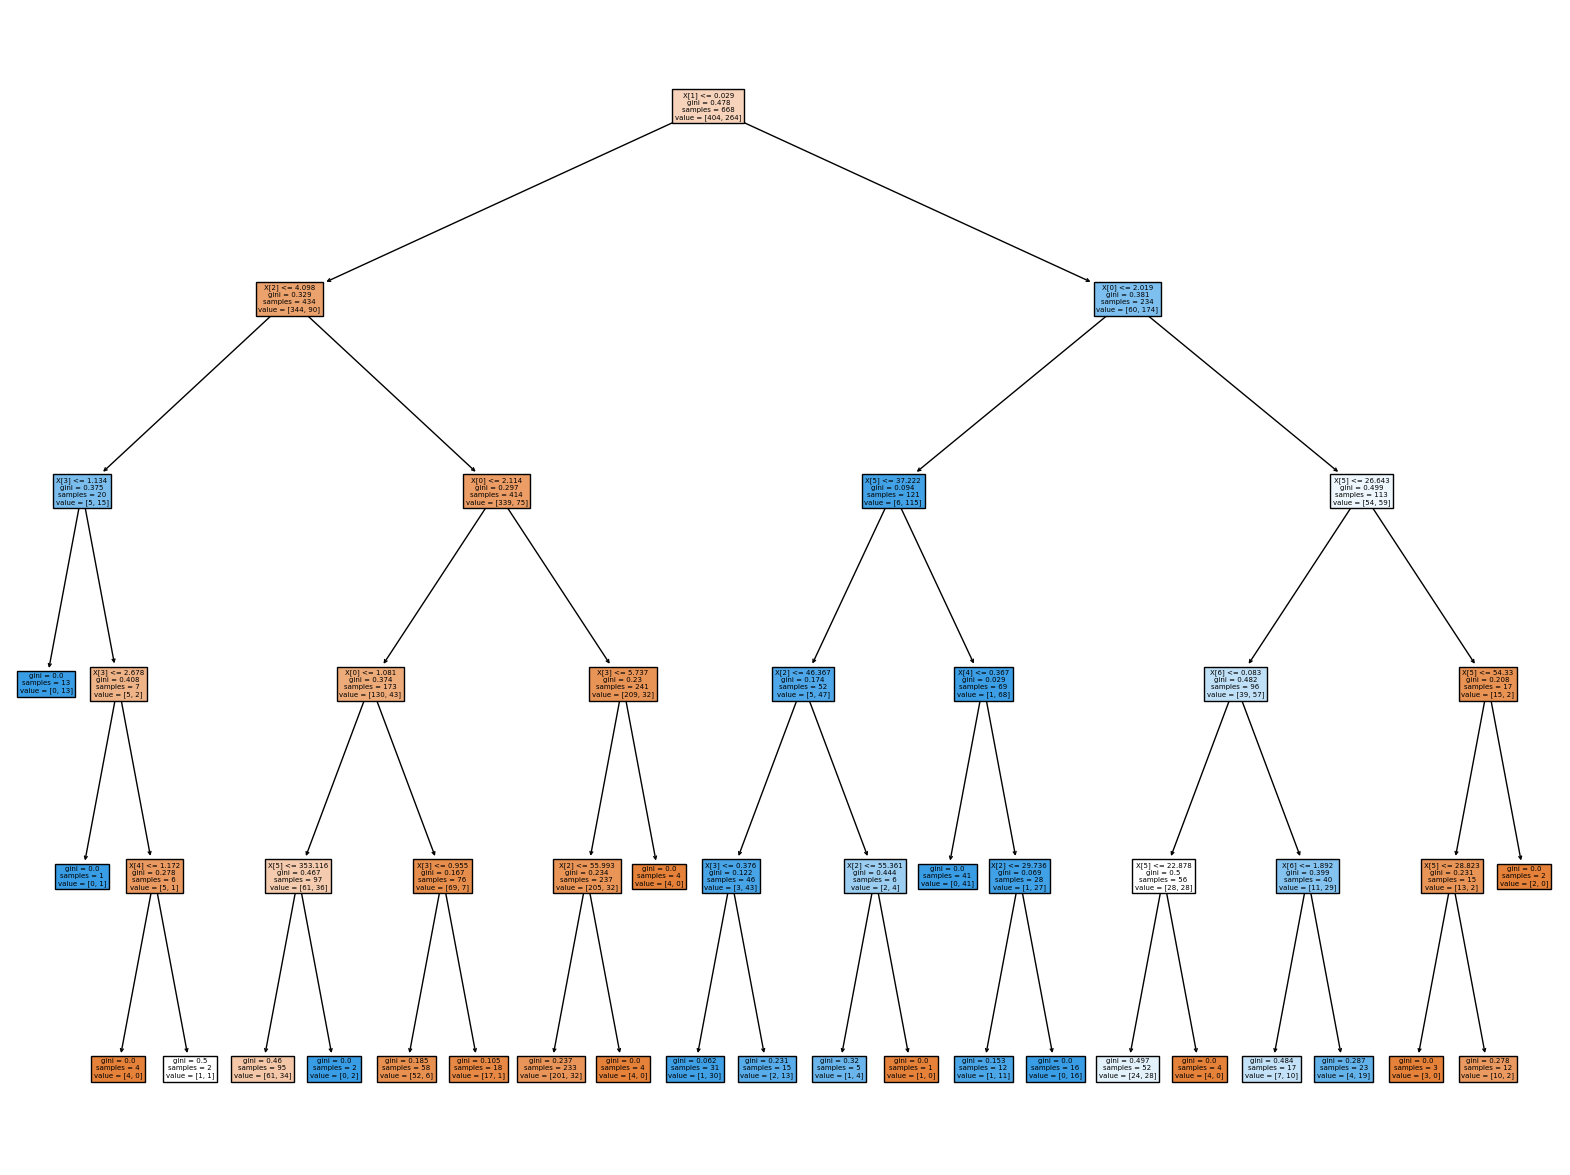

In [54]:
plt.figure(figsize=(20,15))
tree.plot_tree(treemodel,filled=True)
plt.show()

In [55]:
rclf=RandomForestClassifier()

In [57]:
rclf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred=rclf.predict(x_test)

In [59]:
acc=accuracy_score(y_test,y_pred)

In [60]:
acc

0.8340807174887892

In [61]:
grid_param = {
    'n_estimators':["1,2,3,4,8,12,16,34,64,100,200,300"]
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [69]:
n_estimators=[1,2,3,4,6,8,10,12,16,32,64,100,200,360]
accuracy=[]
for i in n_estimators:
    rfc=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    accuracy.append(ac)
print(accuracy,n_estimators)

[0.7219730941704036, 0.8071748878923767, 0.7847533632286996, 0.8251121076233184, 0.8475336322869955, 0.820627802690583, 0.8116591928251121, 0.8385650224215246, 0.820627802690583, 0.8071748878923767, 0.8340807174887892, 0.8295964125560538, 0.8340807174887892, 0.8295964125560538] [1, 2, 3, 4, 6, 8, 10, 12, 16, 32, 64, 100, 200, 360]


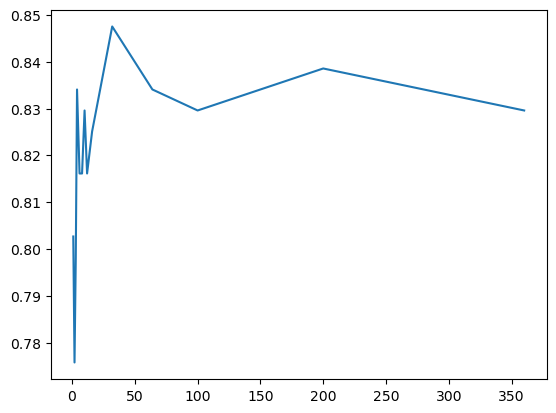

In [66]:
plt.plot(n_estimators,accuracy)
plt.show()

In [70]:
rfc=RandomForestClassifier(n_jobs=-1,oob_score=True)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

In [72]:
y_pred=rfc.predict(x_test)

In [74]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8340807174887892
